# Data Manipulation in Python

### Why

Data rarely comes clean or in the format that we need in order to perform analysis or use it for Machine Learning models.

### What

We will discuss several issues we usually encounter with data, be it:

* Untidy data
* Missing values
* Wrong data types

### How

[Pandas](https://pandas.pydata.org/) is an open source library for data manipulation. It is the first go-to tool in data analysis in Python.

But fisrt... we need data!

## Gathering data

### Datasets in CSV files

CSV files are the most common format in which you will find datasets on the web.

Let's start by downloading a dataset about **House characteristics and selling price** from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

(saved it in `data/housing.csv`)

In [194]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

pd.options.display.max_columns = 999

df = pd.read_csv('data/housing.csv')

The line abode loads our data into a pandas `DataFrame`. A DataFrame can be thought of as a table in a traditional database. Each row in a DataFrame contains values for a sample in our data. While the columnsa are the features for every sample. Let's examine the dataset we just loaded:

In [195]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


the `head()` method shows the first 5 rows of our dataset. You can change the number of rows to show with the parameter `n`. The method `tail()`, analogously, shows the last 5 rows.

### Public APIs

The second most common way of obtaining data is through public API's (Application Programing Interfaces). APIs provide an interface that enables parametrized data gathering. 

Example: [OpenWeatherMap](openweathermap.org).

1. [Sign up](https://openweathermap.org/home/sign_up) and create an API key
2. Copy that API key and use it in your requests

#### Gathering weather data for Stockholm, last month

In [196]:
import os

import requests

api_key = os.environ.get('OPENWEATHERMAP_API')
stockholm_lat = '59.5'
stockholm_lon = '18'
country = 'SE'
url = f'https://api.openweathermap.org/data/2.5/onecall?lat={stockholm_lat}&lon={stockholm_lon}&appid={api_key}'

data = requests.get(url).json()

In [197]:
data.keys()

dict_keys(['lat', 'lon', 'timezone', 'current', 'hourly', 'daily'])

In [198]:
hourly_df = pd.DataFrame.from_records(data.get('hourly'))

In [199]:
hourly_df.head()

,dt,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,weather,rain
0,1589781600,278.55,276.93,1009,87,276.56,2,0.28,163,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN
1,1589785200,280.71,278.54,1010,73,276.19,1,0.97,176,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN
2,1589788800,282.83,280.05,1011,59,275.21,0,1.59,206,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN
3,1589792400,284.66,281.24,1012,47,273.75,0,2.17,222,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN
4,1589796000,285.33,281.39,1012,44,273.45,0,2.85,247,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.13}


In [200]:
daily_df = pd.DataFrame.from_records(data.get('daily'))

In [201]:
daily_df.head()

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,weather,clouds,rain,uvi
0,1589796000,1589767592,1589829756,"{'day': 281.74, 'min': 278.55, 'max': 286.25, ...","{'day': 278.65, 'night': 276.41, 'eve': 281.58...",1010,66,275.76,2.17,222,"[{'id': 500, 'main': 'Rain', 'description': 'l...",1,0.25,3.98
1,1589882400,1589853866,1589916289,"{'day': 280.88, 'min': 277.18, 'max': 284.8, '...","{'day': 276.38, 'night': 275.34, 'eve': 281.47...",1012,67,275.29,4.04,340,"[{'id': 500, 'main': 'Rain', 'description': 'l...",93,1.50,3.95
2,1589968800,1589940143,1590002820,"{'day': 285.18, 'min': 275.91, 'max': 285.18, ...","{'day': 280.72, 'night': 276.48, 'eve': 280.89...",1020,42,271.79,3.44,346,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0,1.38,3.87
3,1590055200,1590026422,1590089349,"{'day': 287.08, 'min': 276.74, 'max': 287.98, ...","{'day': 283.03, 'night': 274.37, 'eve': 279.62...",1022,38,272.59,2.91,309,"[{'id': 800, 'main': 'Clear', 'description': '...",0,NaN,3.96
4,1590141600,1590112704,1590175877,"{'day': 286.23, 'min': 275.64, 'max': 287.98, ...","{'day': 281.86, 'night': 274.15, 'eve': 282.61...",1022,39,272.29,3.29,350,"[{'id': 800, 'main': 'Clear', 'description': '...",0,NaN,4.17


In [202]:
daily_df['timestamp'] = pd.to_datetime(daily_df.dt, unit='s')

In [203]:
daily_df.head()

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,weather,clouds,rain,uvi,timestamp
0,1589796000,1589767592,1589829756,"{'day': 281.74, 'min': 278.55, 'max': 286.25, ...","{'day': 278.65, 'night': 276.41, 'eve': 281.58...",1010,66,275.76,2.17,222,"[{'id': 500, 'main': 'Rain', 'description': 'l...",1,0.25,3.98,2020-05-18 10:00:00
1,1589882400,1589853866,1589916289,"{'day': 280.88, 'min': 277.18, 'max': 284.8, '...","{'day': 276.38, 'night': 275.34, 'eve': 281.47...",1012,67,275.29,4.04,340,"[{'id': 500, 'main': 'Rain', 'description': 'l...",93,1.50,3.95,2020-05-19 10:00:00
2,1589968800,1589940143,1590002820,"{'day': 285.18, 'min': 275.91, 'max': 285.18, ...","{'day': 280.72, 'night': 276.48, 'eve': 280.89...",1020,42,271.79,3.44,346,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0,1.38,3.87,2020-05-20 10:00:00
3,1590055200,1590026422,1590089349,"{'day': 287.08, 'min': 276.74, 'max': 287.98, ...","{'day': 283.03, 'night': 274.37, 'eve': 279.62...",1022,38,272.59,2.91,309,"[{'id': 800, 'main': 'Clear', 'description': '...",0,NaN,3.96,2020-05-21 10:00:00
4,1590141600,1590112704,1590175877,"{'day': 286.23, 'min': 275.64, 'max': 287.98, ...","{'day': 281.86, 'night': 274.15, 'eve': 282.61...",1022,39,272.29,3.29,350,"[{'id': 800, 'main': 'Clear', 'description': '...",0,NaN,4.17,2020-05-22 10:00:00


## Assessing data

Once we have our data, it's important to _familiarize_ with it. In the **assessing** step, we try to answer the following questions:

1. What information contains our data? This is, what columns do we have, what to they mean, what is each row.
2. What are the _types_ of our data? This is important to undestand what operations can we perform in which columns
3. Do we have missing values? If so, what do we do with them? 

### The data exploration process

Usually, any dataset that you get is going to come with at least a minimal description of what it contains. In this case, there is a file `data_description.txt` that contains information on the columns. For the sake of this webminar, we are going to work with a subset of the data:

In [204]:
subset_columns = [
    'Id',             # Id of the house in the dataset
    'LotFrontage',    # Linear feet of street connected to property
    'LotArea',        # Lot size in square feet
    'Alley',          # Type of alley access to property
    'OverallQual',    # Rates the overall material and finish of the house
    'PoolArea',       # Pool area in square feet
    'SalePrice'       # Sale price in $
]

df_reduced = df[subset_columns]

In [205]:
df_reduced.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,PoolArea,SalePrice
0,1,65.0,8450,NaN,7,0,208500
1,2,80.0,9600,NaN,6,0,181500
2,3,68.0,11250,NaN,7,0,223500
3,4,60.0,9550,NaN,7,0,140000
4,5,84.0,14260,NaN,8,0,250000


The `info()` method in pandas gives you an overview of data types and missing values

In [206]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   Alley        91 non-null     object 
 4   OverallQual  1460 non-null   int64  
 5   PoolArea     1460 non-null   int64  
 6   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 80.0+ KB


and `describe()` gives you descriptive statistics of your numerical features (columns)

In [207]:
df_reduced.describe()

,Id,LotFrontage,LotArea,OverallQual,PoolArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,2.758904,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,40.177307,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,738.000000,755000.000000


In [208]:
# Id: is the identidier unique?
df_reduced.Id.is_unique

True

In [209]:
# LotFrontage: should we convert feet to meters? what do the NaN values mean here?
df_reduced.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [210]:
# 1 foot ~ 0.3048 meters
(df_reduced.LotFrontage*0.3048).head()

0    19.8120
1    24.3840
2    20.7264
3    18.2880
4    25.6032
Name: LotFrontage, dtype: float64

In [211]:
# What are the different values for Alley? what do a NaN mean here? should we change it?
df_reduced.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [212]:
df_reduced.Alley.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

In [213]:
df_reduced.Alley.fillna('No Alley').head()

0    No Alley
1    No Alley
2    No Alley
3    No Alley
4    No Alley
Name: Alley, dtype: object

In [214]:
# What are the different values for OverallQual? does it make sense that it is a numerical features?
df_reduced.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

These are probably quite subjective rankings. Also, they are too granular, it would give a better overview if we would reduce the number of categories here. We can **bin** the categories in ranges, for example, quality 1-4 is _BAD_, 5-7 _GOOD_ and 7-10 _BEST_.

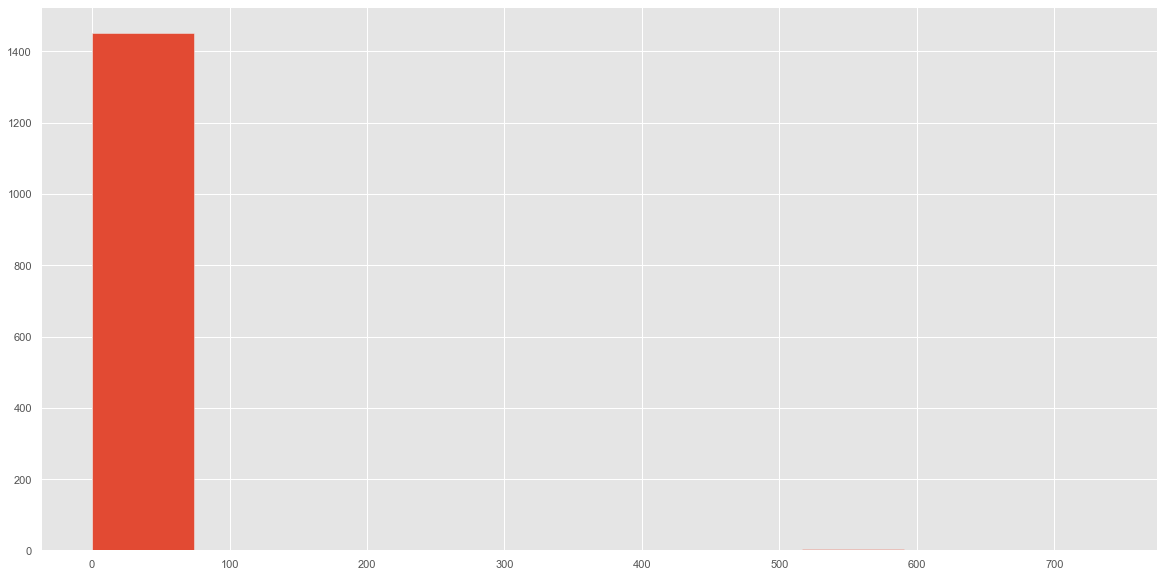

In [215]:
# The distribution of PoolArea looks very strange numerically, let's have a look at it
df_reduced.PoolArea.hist(figsize=(20, 10));

Remember that there are 1460 samples, and from the histogram we see that more than 1400 have pool Area 0. How many exactly...

In [216]:
# How many rows have value 0 for pool area?
print(f'{(df_reduced[df_reduced.PoolArea == 0].shape[0]/df_reduced.shape[0])*100}% of rows have 0 as value for pool area')

99.52054794520548% of rows have 0 as value for pool area


A variable that has almost all rows with the same value is not informative at all, and I would proceed to remove it. 

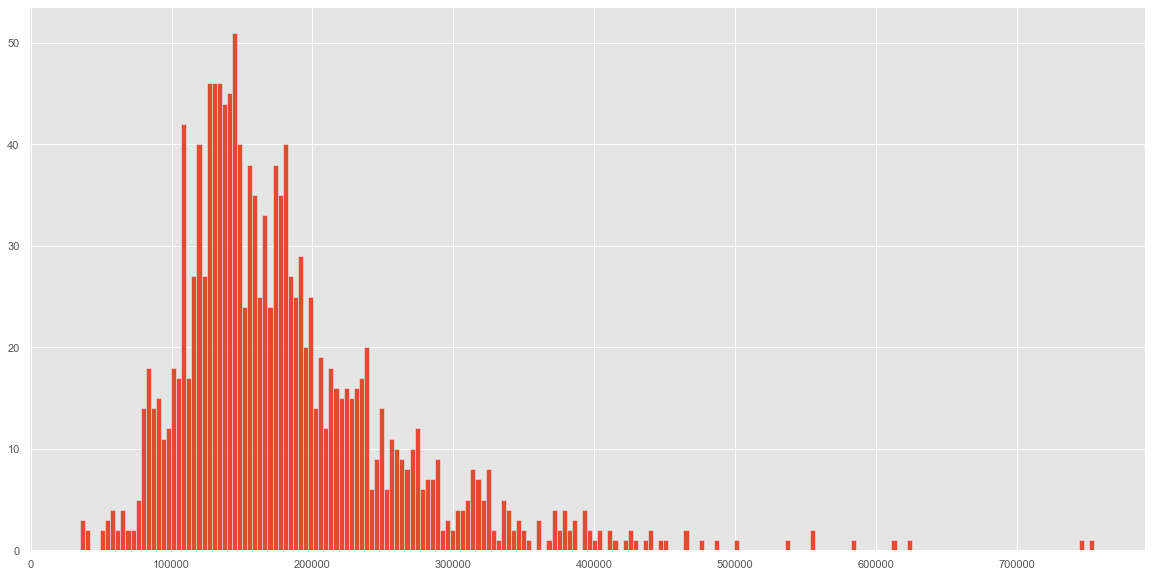

In [218]:
# How does the sale price distribution look like?
df_reduced.SalePrice.hist(figsize=(20, 10), bins=200);

## Cleaning data

Once we have assessed our data, we will proceed to clean it. This means applying all the decisions taken in the previous step on a systematic way.

In [222]:
def process_dataset(df):
    # 1. LotFrontage should be converted to m, and NaN values filled in with 0 (meaning no street connected to the property)
    df['LotFrontage'] = df['LotFrontage'].fillna(0)
    df['LotFrontage'] = df['LotFrontage']*0.3048
    
    # 2. Lot Area should be converted to sqm
    df['LotArea'] = df['LotArea']*0.092903
    
    # 2. Change NaN in Alley for 'No Alley'
    df['Alley'] = df['Alley'].fillna('No Alley')
    
    # 3. Reduce categories of OverallQual to BAD, GOOD, BEST
    def _map_quality_categories(n):
        if n <= 4:
            return 'BAD'
        elif n > 4 and n <= 7:
            return 'GOOD'
        else:
            return 'BEST'
    
    df['OverallQual'] = df['OverallQual'].apply(_map_quality_categories)
    
    # 4. Drop PoolArea, we don't need it
    df = df.drop(columns=['PoolArea'])
    
    return df

In [223]:
df_processed = process_dataset(df_reduced.copy(deep=True))

In [224]:
df_processed.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,SalePrice
0,1,19.8120,785.03035,No Alley,GOOD,208500
1,2,24.3840,891.86880,No Alley,GOOD,181500
2,3,20.7264,1045.15875,No Alley,GOOD,223500
3,4,18.2880,887.22365,No Alley,GOOD,140000
4,5,25.6032,1324.79678,No Alley,BEST,250000


In [225]:
df_reduced.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,PoolArea,SalePrice
0,1,65.0,8450,NaN,7,0,208500
1,2,80.0,9600,NaN,6,0,181500
2,3,68.0,11250,NaN,7,0,223500
3,4,60.0,9550,NaN,7,0,140000
4,5,84.0,14260,NaN,8,0,250000


## Other explorations

Much like SQL, in Python you can also do more complicated explorations and aggregations, souch as `groupby()`. Let's see some examples.

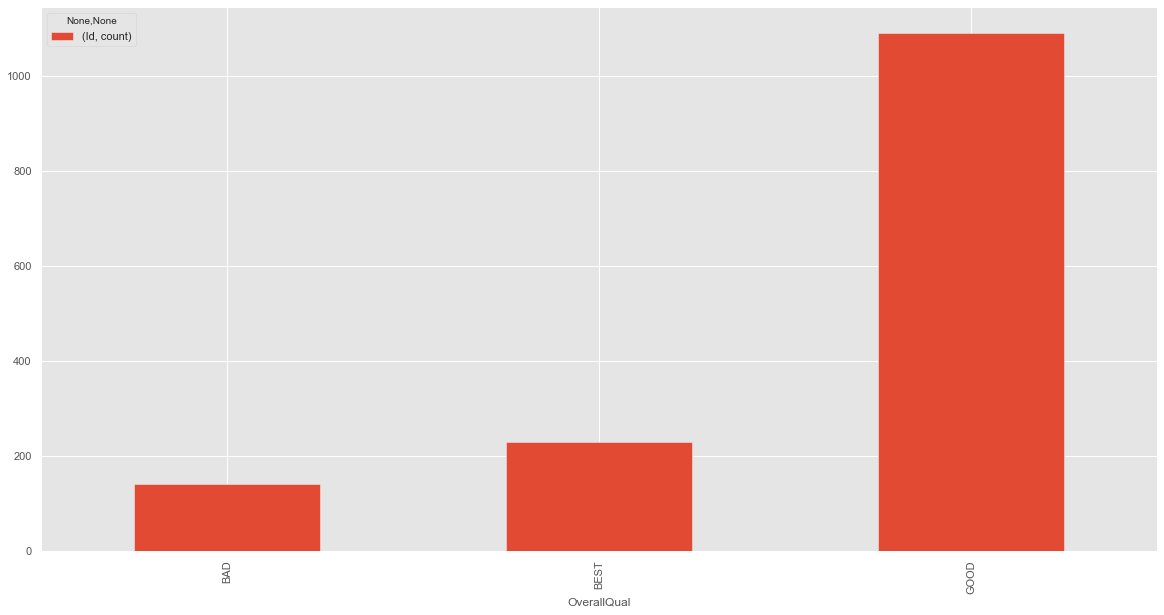

In [227]:
# How is the share of BAD, GOOD and BEST house quelities?
df_processed[['Id', 'OverallQual']].groupby('OverallQual').agg(['count']).plot(kind='bar', figsize=(20, 10));

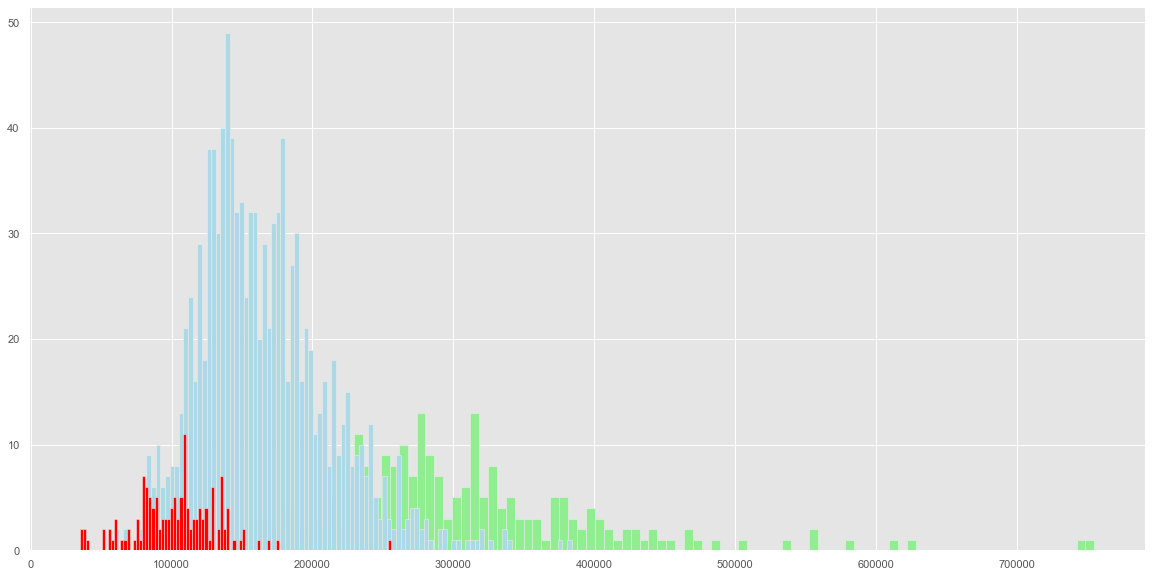

In [230]:
# Are the distributions of prices very different based on the overall quality of the house?
df_processed[df_processed.OverallQual == 'BEST'].SalePrice.hist(bins=100, figsize=(20, 10), color='lightgreen');
df_processed[df_processed.OverallQual == 'GOOD'].SalePrice.hist(bins=100, figsize=(20, 10), color='lightblue');
df_processed[df_processed.OverallQual == 'BAD'].SalePrice.hist(bins=100, figsize=(20, 10), color='red');

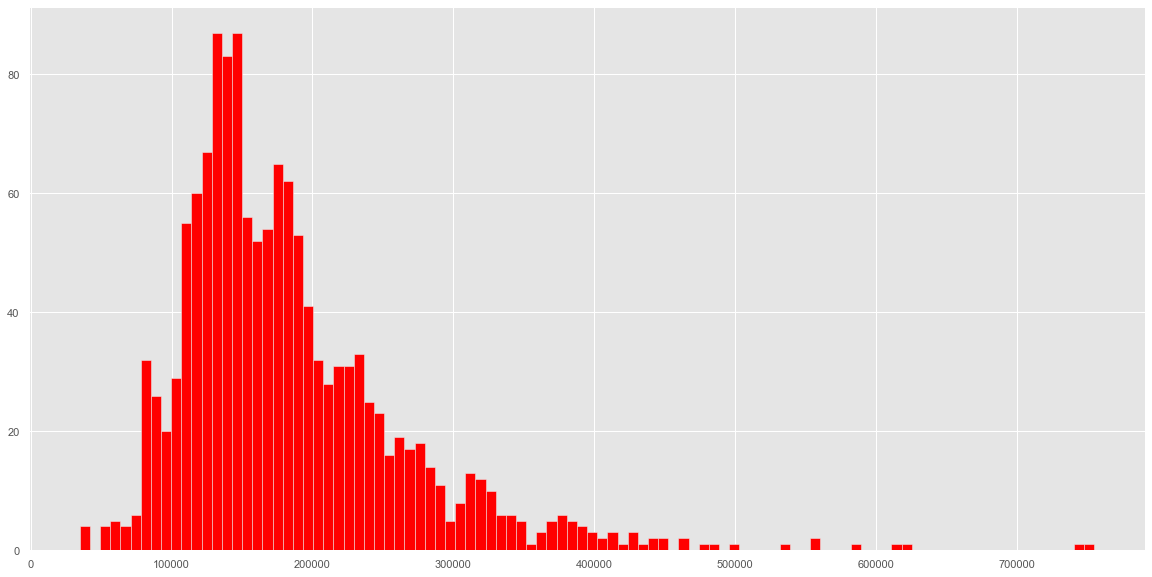

In [231]:
# Are the distributions of prices very different based on the existance of an Alley entry?
df_processed[df_processed.Alley == 'Pave'].SalePrice.hist(bins=100, figsize=(20, 10), color='lightgreen');
df_processed[df_processed.Alley == 'Grvl'].SalePrice.hist(bins=100, figsize=(20, 10), color='lightblue');
df_processed[df_processed.Alley == 'No Alley'].SalePrice.hist(bins=100, figsize=(20, 10), color='red');

That is not very informative, we don't have enough samples. A numerical summary would be a better option in this case

In [232]:
df_processed.groupby('Alley')['SalePrice'].agg(['mean', 'std', 'count']).sort_values(by='mean')

,mean,std,count
Alley,,,
Grvl,122219.080000,34780.780734,50
Pave,168000.585366,38370.375243,41
No Alley,183452.131483,80667.145180,1369


Intuitively this is a surprising result to me. I would _initially_ expect that houses with paved alley entrance would be more expensive than houses with no alley entrance. However seeing this made me think that houses with no alley entrance at all are probably more accessible, so it does make sense. This is an example of how checking in with the data can make you understand it and reason about it

## Processing new features

Another very common task is feature generation. This is done once the format for the data is tidy and all initial column transformations have been done.

In feature generation we create new information based either on the columns we aready have, or from other data sources.

In [233]:
df_processed.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,SalePrice
0,1,19.8120,785.03035,No Alley,GOOD,208500
1,2,24.3840,891.86880,No Alley,GOOD,181500
2,3,20.7264,1045.15875,No Alley,GOOD,223500
3,4,18.2880,887.22365,No Alley,GOOD,140000
4,5,25.6032,1324.79678,No Alley,BEST,250000


In [234]:
df_processed['totalArea'] = df_processed.LotArea + df_processed.LotFrontage

In [235]:
df_processed.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,SalePrice,totalArea
0,1,19.8120,785.03035,No Alley,GOOD,208500,804.84235
1,2,24.3840,891.86880,No Alley,GOOD,181500,916.25280
2,3,20.7264,1045.15875,No Alley,GOOD,223500,1065.88515
3,4,18.2880,887.22365,No Alley,GOOD,140000,905.51165
4,5,25.6032,1324.79678,No Alley,BEST,250000,1350.39998


And then you can proceed with the same explorations for the new variables, for example:

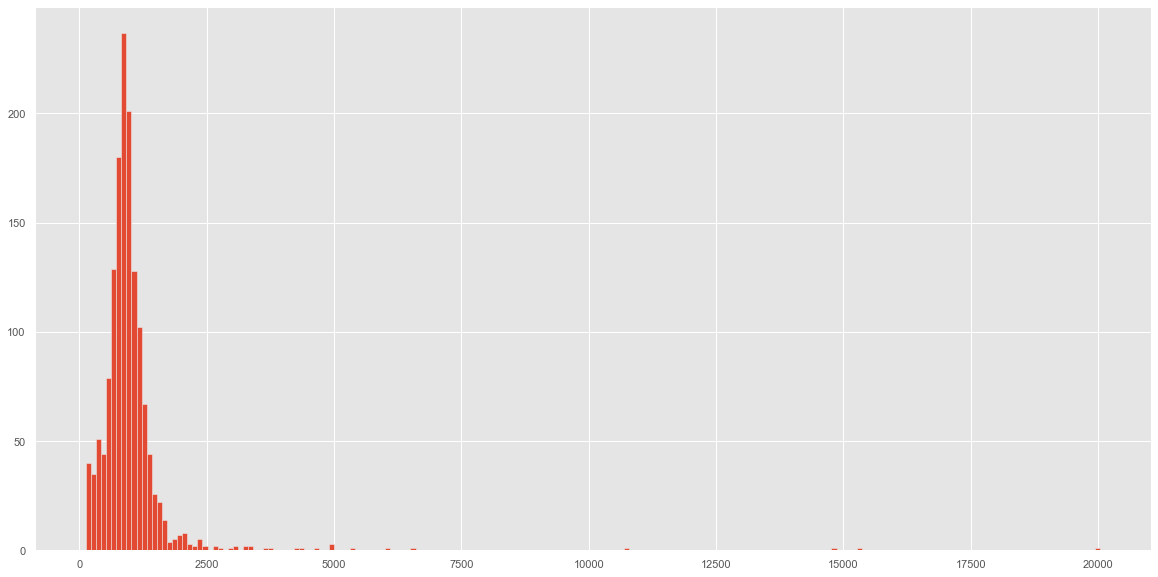

In [237]:
df_processed.totalArea.hist(figsize=(20, 10), bins=200);